# Project: Analyze the European Soccer Database 

The database I picked is a soccer database provided by Kaggle. It contains information about soccer matches, players, and teams from a variety of European countries from 2008 to 2016. For this project, I will be analyzing data from European Professional Football matches and teams from 2008 to 2016. The information was downloaded in SQLite format.

- Questions:
  - What are the top ten teams with the most wins from 2008 to 2016 
  - What are the top ten teams with the most wins in the 2011/2012 season 
  - What is the trend of top 5 match winners in england between 2008 and 2016
  - What is the average number of goals scored in each league per season
  - What are the top 10 players with the highest overall rating ?
  - What are the attributes that contribute to the players' overall rating?
  - What is the ratings of the top 5 most rated player over the period of 2008 to 2015
  - What team attributes lead to the most victories?

### Importing necessary packages

In [171]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Wrangling
- Gathering all the data into a particular place

In [172]:
# Create the connection
df = sqlite3.connect('database.sqlite')
# Create the dataframe from a query
table = pd.read_sql_query("SELECT type, name, tbl_name FROM sqlite_master WHERE type = 'table'", df)
table

,type,name,tbl_name
0,table,sqlite_sequence,sqlite_sequence
1,table,Player_Attributes,Player_Attributes
2,table,Player,Player
3,table,Match,Match
4,table,League,League
5,table,Country,Country
6,table,Team,Team
7,table,Team_Attributes,Team_Attributes


In [173]:
# load all the tables as a dataframe
country = pd.read_sql_query("select * from Country", df)
player_a = pd.read_sql_query("select * from Player_Attributes", df)
player = pd.read_sql_query("select * from Player", df)
match = pd.read_sql_query("select * from Match", df)
league = pd.read_sql_query("select * from League", df)
team = pd.read_sql_query("select * from Team", df)
team_a = pd.read_sql_query("select * from Team_Attributes", df)

#### Checking the dataframe to see which data can be combined
1. I will be checking checking the league, match and country dataframes
2. I will then combine the dataframes together

In [174]:
league.columns

Index(['id', 'country_id', 'name'], dtype='object')

In [175]:
country.columns

Index(['id', 'name'], dtype='object')

In [176]:
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)




We can see that there are common columns between the dataframes, we are going to combine match, league and country dataframes together

In [177]:
match_new = pd.read_sql_query("SELECT * FROM league l join country c on c.id = l.country_id  join match on match.league_id = l.id", df)
match_new.head()

,id,country_id,name,id,name,id,country_id,league_id,season,stage,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,Belgium Jupiler League,1,Belgium,1,1,1,2008/2009,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,1,Belgium Jupiler League,1,Belgium,2,1,1,2008/2009,1,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,1,Belgium Jupiler League,1,Belgium,3,1,1,2008/2009,1,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,1,1,Belgium Jupiler League,1,Belgium,4,1,1,2008/2009,1,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,1,Belgium Jupiler League,1,Belgium,5,1,1,2008/2009,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


We would do the same for the team and team attributes and also the player and player attributes

In [178]:
player_new = pd.read_sql_query("SELECT * FROM player p join player_attributes pa on p.player_api_id = pa.player_api_id ", df)
player_new.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [179]:
team_new = pd.read_sql_query("SELECT * FROM team t  join team_attributes ta on t.team_api_id = ta.team_api_id ", df)
team_new.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,8485,2011-02-22 00:00:00,47,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


#### Check the number of rows and columns in each dataframe

In [180]:
name = ['match_new', 'player_new', 'team_new']
table = [match_new, player_new, team_new]

for (f, b) in zip(name, table):
    print("The number of rows in", f, "is:", b.shape[0])
    print("The number of columns in", f, "is:", b.shape[1])
    print("-"*50)
    

The number of rows in match_new is: 25979
The number of columns in match_new is: 120
--------------------------------------------------
The number of rows in player_new is: 183978
The number of columns in player_new is: 49
--------------------------------------------------
The number of rows in team_new is: 1458
The number of columns in team_new is: 30
--------------------------------------------------


#### Check for the duplicates in each table

In [181]:
print("The number of duplicates in team_new is:", team_new.duplicated().sum())
print('-'*50)
print("The number of duplicates in match_new is:", match_new.duplicated().sum())
print('-'*50)
print("The number of duplicates in player_new is:", player_new.duplicated().sum())

The number of duplicates in team_new is: 0
--------------------------------------------------
The number of duplicates in match_new is: 0
--------------------------------------------------
The number of duplicates in player_new is: 0


We can see that there are no duplicates in all the dataframes

#### Checking for the percentage of missing values in each dataframe

In [182]:
pd.set_option("display.max_rows", None)

In [183]:
match_new.isnull().sum() * 100 / len(match_new)

id                   0.000000
country_id           0.000000
name                 0.000000
id                   0.000000
name                 0.000000
id                   0.000000
country_id           0.000000
league_id            0.000000
season               0.000000
stage                0.000000
date                 0.000000
match_api_id         0.000000
home_team_api_id     0.000000
away_team_api_id     0.000000
home_team_goal       0.000000
away_team_goal       0.000000
home_player_X1       7.009508
home_player_X2       7.009508
home_player_X3       7.051850
home_player_X4       7.051850
home_player_X5       7.051850
home_player_X6       7.051850
home_player_X7       7.051850
home_player_X8       7.051850
home_player_X9       7.051850
home_player_X10      7.051850
home_player_X11      7.051850
away_player_X1       7.051850
away_player_X2       7.051850
away_player_X3       7.051850
away_player_X4       7.051850
away_player_X5       7.051850
away_player_X6       7.051850
away_playe

The first 16 columns are not having missing values, any column having a percentage greater than 5% should be removed

In [184]:
team_new.isnull().sum() * 100 / len(team_new)

id                                 0.000000
team_api_id                        0.000000
team_fifa_api_id                   0.000000
team_long_name                     0.000000
team_short_name                    0.000000
id                                 0.000000
team_fifa_api_id                   0.000000
team_api_id                        0.000000
date                               0.000000
buildUpPlaySpeed                   0.000000
buildUpPlaySpeedClass              0.000000
buildUpPlayDribbling              66.460905
buildUpPlayDribblingClass          0.000000
buildUpPlayPassing                 0.000000
buildUpPlayPassingClass            0.000000
buildUpPlayPositioningClass        0.000000
chanceCreationPassing              0.000000
chanceCreationPassingClass         0.000000
chanceCreationCrossing             0.000000
chanceCreationCrossingClass        0.000000
chanceCreationShooting             0.000000
chanceCreationShootingClass        0.000000
chanceCreationPositioningClass  

We can see that only "buildUpPlayDribbling" has missing values of 66%, so it should be removed.

In [185]:
player_new.isnull().sum() * 100 / len(player_new)

id                     0.000000
player_api_id          0.000000
player_name            0.000000
player_fifa_api_id     0.000000
birthday               0.000000
height                 0.000000
weight                 0.000000
id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_pow

We have some missing values of less than 2% which can be drop, and it won't affect the data

#### Checking data-types to see if it's the right datatype

In [186]:
match_new.dtypes

id                    int64
country_id            int64
name                 object
id                    int64
name                 object
id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
away_player_X9      

The date column is not in a date-time data type, it needs to be converted

In [187]:
team_new.dtypes

id                                  int64
team_api_id                         int64
team_fifa_api_id                    int64
team_long_name                     object
team_short_name                    object
id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                   

In [188]:
player_new.dtypes

id                       int64
player_api_id            int64
player_name             object
player_fifa_api_id       int64
birthday                object
height                 float64
weight                   int64
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping 

## Data Cleaning

Dropping Irrevelant Columns

In [189]:
#Drop columns in the match dataframe
df_m = match_new.drop(match_new.columns[match_new.isnull().any()], axis = 1)

df_m.head(2)

In [190]:
df_m.drop(["id","country_id","league_id"], axis = 1, inplace = True)
df_m.head(2)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,name,name,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0


In [191]:
cols = []
count = 1

for column in df_m.columns:
    if column == 'name':
        cols.append(f'name_{count}')
        count+=1
        continue
    cols.append(column)
df_m.columns = cols

df_m.head(2)

,name_1,name_2,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0


In [192]:
df_m.rename(columns = {"name_1":"league", "name_2":"country"}, inplace  = True)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


#### Re-checking for missing values

In [193]:
#checking for missing values
df_m.isnull().sum()

league              0
country             0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

#### Dropping the column with of missing values in the team dataframe

In [194]:
df_t = team_new.drop(["buildUpPlayDribbling","id"], axis = 1)

In [195]:
# Renaming columns with the same name
cols = []
count = 1

for column in df_t.columns:
    if column == 'team_api_id':
        cols.append(f'team_api_id_{count}')
        count+=1
        continue
    cols.append(column)
df_t.columns = cols

In [196]:
# Renaming columns with the same name
cols = []
count = 1

for column in df_t.columns:
    if column == 'team_fifa_api_id':
        cols.append(f'team_fifa_api_id_{count}')
        count+=1
        continue
    cols.append(column)
df_t.columns = cols

In [197]:
df_t.head(2)

,team_api_id_1,team_fifa_api_id_1,team_long_name,team_short_name,team_fifa_api_id_2,team_api_id_2,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,434,FC Aarau,AAR,434,9930,2010-02-22 00:00:00,60,Balanced,Little,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,434,FC Aarau,AAR,434,9930,2014-09-19 00:00:00,52,Balanced,Normal,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [198]:
#drop columns with "_2"
df_t.drop(["team_api_id_2","team_fifa_api_id_2"], axis = 1, inplace =True)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [199]:
#rename the "_1" columns
df_t.rename(columns = {"team_api_id_1":"team_api_id", "team_fifa_api_id_1":"team_fifa_api_id"}, inplace  = True)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [200]:
#rechecking to see if there are missing values
df_t.isnull().sum()

team_api_id                       0
team_fifa_api_id                  0
team_long_name                    0
team_short_name                   0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

### Droping missing values from the players dataframe

In [201]:
df_p = player_new.dropna()

In [202]:
df_p.drop(["id"], axis = 1, inplace = True)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [203]:
# Renaming columns with the same name
cols = []
count = 1

for column in df_p.columns:
    if column == 'player_api_id':
        cols.append(f'player_api_id_{count}')
        count+=1
        continue
    cols.append(column)
df_p.columns = cols

In [204]:
# Renaming columns with the same name
cols = []
count = 1

for column in df_p.columns:
    if column == 'player_fifa_api_id':
        cols.append(f'player_fifa_api_id_{count}')
        count+=1
        continue
    cols.append(column)
df_p.columns = cols

In [205]:
#Dropping columns with "_2" 
df_p.drop(["player_api_id_2","player_fifa_api_id_2"], axis = 1, inplace =True)

In [206]:
#Renaming columns with "_1"
df_p.rename(columns = {"player_api_id_1":"player_api_id", "player_fifa_api_id_1":"player_fifa_api_id"}, inplace  = True)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [207]:
df_p.head(2)

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [208]:
#Checking missing values
df_p.isnull().sum()

player_api_id          0
player_name            0
player_fifa_api_id     0
birthday               0
height                 0
weight                 0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0


### Change the date data type from object to datetime

In [209]:
df_m["date"] = pd.to_datetime(df_m['date'])
df_t["date"] = pd.to_datetime(df_t['date'])
df_p["date"] = pd.to_datetime(df_p['date'])

<ipython-input-209-fd564fc9484a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m["date"] = pd.to_datetime(df_m['date'])
<ipython-input-209-fd564fc9484a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t["date"] = pd.to_datetime(df_t['date'])
<ipython-input-209-fd564fc9484a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Checking to see if the changes has been effected

In [210]:
print("Match:",type(df_m["date"][0]))
print("Team:",type(df_t["date"][0]))
print("Player:",type(df_p["date"][0]))

Match: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Team: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Player: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


Checking the shape of the new dataframes

In [211]:
name = ['match', 'player', 'team']
table = [df_m, df_p, df_t]

for (f, b) in zip(name, table):
    print("The number of rows in", f, "is:", b.shape[0])
    print("The number of columns in", f, "is:", b.shape[1])
    print("-"*50)
    

The number of rows in match is: 25979
The number of columns in match is: 10
--------------------------------------------------
The number of rows in player is: 180354
The number of columns in player is: 45
--------------------------------------------------
The number of rows in team is: 1458
The number of columns in team is: 25
--------------------------------------------------


In [212]:
df_t.head(1)

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,434,FC Aarau,AAR,2010-02-22,60,Balanced,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


### Getting the home team and the away team names

- Merging the match dataframe and the team dataframe

In [213]:
merge_tm = pd.merge(left = df_m, right = df_t, left_on = 'home_team_api_id', right_on = "team_api_id", how = "right")

In [214]:
merge_tm.tail(2)

,league,country,season,stage,date_x,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
142091,Belgium Jupiler League,Belgium,2015/2016,7,2015-09-12,1979875,10000,9991,1,1,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
142092,Belgium Jupiler League,Belgium,2015/2016,9,2015-09-25,1979891,10000,10001,4,2,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [215]:
#Selecting the needed columns
df_m = merge_tm[['league', 'country', 'season', 'stage', 'date_x', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name']]

In [216]:
df_m.head(2)

,league,country,season,stage,date_x,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,Switzerland Super League,Switzerland,2008/2009,1,2008-07-19,486264,9930,10179,3,1,9930,434,FC Aarau,AAR
1,Switzerland Super League,Switzerland,2008/2009,11,2008-10-04,486316,9930,9824,4,0,9930,434,FC Aarau,AAR


In [217]:
#renaming the 'team_long_name' to "home_team_name"
df_m.rename(columns = {'team_long_name':"home_team_name"}, inplace = True)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [218]:
df_m.drop(["home_team_api_id","team_api_id"], axis = 1, inplace = True)

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Merging the team and match dataframes to get the way team names

In [219]:
df_m = df_m.merge(df_t, how = "right", left_on = "away_team_api_id", right_on = "team_api_id")

In [220]:
df_m.head(2)

,league,country,season,stage,date_x,match_api_id,away_team_api_id,home_team_goal,away_team_goal,team_fifa_api_id_x,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,Switzerland Super League,Switzerland,2008/2009,17,2008-12-04,486345,9930,3,1,896,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,Switzerland Super League,Switzerland,2008/2009,23,2009-03-07,589790,9930,3,1,896,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [221]:
#Selecting the needed columns
df_m = df_m[['league', 'country', 'season', 'stage', 'date_x', 'match_api_id', 'home_team_goal', 'away_team_goal',
       'team_fifa_api_id_x', 'home_team_name', 'team_long_name', 'date']]

In [222]:
df_m.head(2)

,league,country,season,stage,date_x,match_api_id,home_team_goal,away_team_goal,team_fifa_api_id_x,home_team_name,team_long_name,date
0,Switzerland Super League,Switzerland,2008/2009,17,2008-12-04,486345,3,1,896,FC Basel,FC Aarau,2010-02-22
1,Switzerland Super League,Switzerland,2008/2009,23,2009-03-07,589790,3,1,896,FC Basel,FC Aarau,2010-02-22


In [223]:
#renaming the 'team_long_name' as "away_team_name"
df_m.rename(columns = {'team_long_name':"away_team_name"}, inplace = True)

Extracting the year from the date columns

In [224]:
df_m['year'] = df_m["date_x"].dt.year

Splitting the season to get both the start season and the end season

In [225]:
start_season = df_m['season'].apply(lambda x: x.split("/")[0])
end_season = df_m['season'].apply(lambda x: x.split("/")[1])

df_m["start_season"] = start_season 
df_m["end_season"] = end_season



In [226]:
#dropping the season column
df_m.drop(["season"], axis = 1, inplace = True)

In [227]:
#selecting the needed columns
df_m = df_m[['league', 'country', 'stage', 'date_x','year', 'start_season',
       'end_season', 'match_api_id', 'team_fifa_api_id_x',
       'home_team_goal', 'away_team_goal',
       'home_team_name', 'away_team_name', ]]

In [228]:
df_m.head(2)

,league,country,stage,date_x,year,start_season,end_season,match_api_id,team_fifa_api_id_x,home_team_goal,away_team_goal,home_team_name,away_team_name
0,Switzerland Super League,Switzerland,17,2008-12-04,2008,2008,2009,486345,896,3,1,FC Basel,FC Aarau
1,Switzerland Super League,Switzerland,23,2009-03-07,2009,2008,2009,589790,896,3,1,FC Basel,FC Aarau


In [229]:
#dropping duplicates values
df_m = df_m.drop_duplicates()

## Exploratory Data Analysis

In [230]:
#Creating a copy of the dataset
df_mw = df_m.copy()

In [231]:
#create a column to see the winner of the match
conditions = [(df_mw['home_team_goal'] > df_mw['away_team_goal']), (df_mw['home_team_goal'] < df_mw['away_team_goal'])]
choices = [df_mw['home_team_name'], df_mw['away_team_name']]
df_mw['winner'] = np.select(conditions, choices, default='draw')
df_mw.head()

,league,country,stage,date_x,year,start_season,end_season,match_api_id,team_fifa_api_id_x,home_team_goal,away_team_goal,home_team_name,away_team_name,winner
0,Switzerland Super League,Switzerland,17,2008-12-04,2008,2008,2009,486345,896,3,1,FC Basel,FC Aarau,FC Basel
1,Switzerland Super League,Switzerland,23,2009-03-07,2009,2008,2009,589790,896,3,1,FC Basel,FC Aarau,FC Basel
2,Switzerland Super League,Switzerland,2,2009-07-19,2009,2009,2010,663675,896,2,1,FC Basel,FC Aarau,FC Basel
3,Switzerland Super League,Switzerland,21,2010-02-20,2010,2009,2010,768253,896,2,1,FC Basel,FC Aarau,FC Basel
4,Switzerland Super League,Switzerland,1,2013-07-13,2013,2013,2014,1471628,896,3,1,FC Basel,FC Aarau,FC Basel


In [232]:
#Checking the number of winners in total
df_mw["winner"].value_counts()

draw                            6510
FC Barcelona                     234
Real Madrid CF                   228
Celtic                           218
FC Bayern Munich                 193
Manchester United                192
Juventus                         189
Ajax                             179
SL Benfica                       177
PSV                              176
FC Basel                         176
Chelsea                          176
Manchester City                  175
Paris Saint-Germain              175
FC Porto                         174
Arsenal                          170
Atlético Madrid                  167
Roma                             162
Borussia Dortmund                157
Milan                            154
Inter                            154
Olympique Lyonnais               153
Napoli                           153
Tottenham Hotspur                151
Liverpool                        150
LOSC Lille                       147
Olympique de Marseille           143
V

In [233]:
#Excluding the instance where there's a draw
df_mw = df_mw[df_mw.winner != 'draw']

In [234]:
#selecting the necessary columns
df_mw = df_mw[['league', 'country', 'date_x', 'year', 'start_season',
       'end_season', 'home_team_goal','away_team_goal', 'home_team_name', 'away_team_name', 'winner']]

In [235]:
#Checking the number of rows and columns in the match dataframe
df_m.shape

(25629, 13)

In [236]:
#Checking the columns and rows in the match winners dataframe
df_mw.shape

(19119, 11)

In [237]:
#Creating a copy 
df_match = df_mw.copy()

### What are the top ten teams with the most wins from 2008 to 2016 

In [238]:
top_10 = df_match["winner"].value_counts()[:10]

<AxesSubplot:title={'center':'The top ten teams with the total number of matches won between 2008 and 2016'}, xlabel='Teams', ylabel='Matches won'>

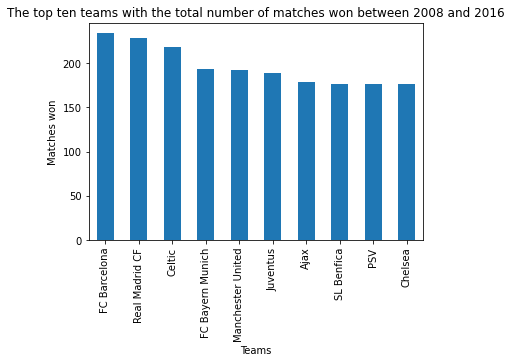

In [239]:
top_10.plot(kind = 'bar', title = "The top ten teams with the total number of matches won between 2008 and 2016", ylabel = "Matches won", xlabel = "Teams"  )

We can see the teams with the most wins during this period. FC Barcelona won the most matches in total from 2008 to 2016

#### What are the top ten teams with the most wins in the 2011/2012 season 

In [240]:
df_2011 = df_match[df_match['start_season'] == '2011' ]

In [241]:
df_2011_2012 = df_2011[df_2011["end_season"] == '2012']

<AxesSubplot:title={'center':'The top ten match winners with the 2011/2012 season'}, xlabel='Teams', ylabel='Number of matches won'>

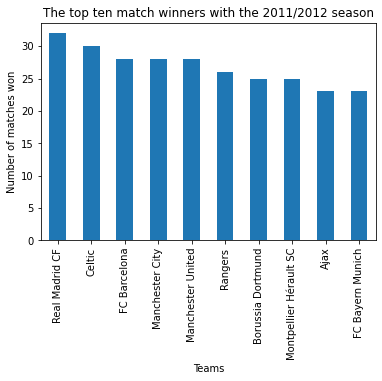

In [242]:
df_2011_2012["winner"].value_counts()[:10].plot(kind = 'bar', title = "The top ten match winners with the 2011/2012 season", xlabel = "Teams", ylabel = "Number of matches won")

The top ten match winners for the 2011/2012 season are shown above. Real Madrid won the most matches that season 

### What is the trend of top 5 match winners in england between 2008 and 2016

In [243]:
#Filtering the english teams
england = df_mw[df_mw["country"] == "England"]

In [244]:
#Showing the top 5 teams with the most wins
england[["winner"]].value_counts().head(5)

winner           
Manchester United    192
Chelsea              176
Manchester City      175
Arsenal              170
Tottenham Hotspur    151
dtype: int64

In [245]:
#selecting necessary columns
england_new = england[["start_season","end_season","winner"]]

In [246]:
#counting the number of winners in england
england_new = england_new.value_counts()

In [247]:
#converting back to a dataframe
eng_val = england_new.to_frame().reset_index()

In [248]:
#providing the season columns
eng_val["season"] = eng_val["start_season"]+ "/"+ eng_val["end_season"]

In [249]:
eng_val.head()

,start_season,end_season,winner,0,season
0,2011,2012,Manchester City,28,2011/2012
1,2008,2009,Manchester United,28,2008/2009
2,2012,2013,Manchester United,28,2012/2013
3,2011,2012,Manchester United,28,2011/2012
4,2009,2010,Manchester United,27,2009/2010


In [250]:
#Group by winner and season 
eng_grp = eng_val.groupby(["winner","season"])[0].mean()

In [251]:
#converting back to dataframe
eng_df = eng_grp.to_frame().reset_index()

In [252]:
#renaming the columns from 0 to number of wins
eng_df.rename(columns = {0:"number_of_wins"}, inplace = True)

In [253]:
#The top 5 match winners in england
top_5 = eng_df[eng_df["winner"].isin(["Manchester United","Arsenal","Chelsea","Manchester City","Tottenham Hotspur"])]

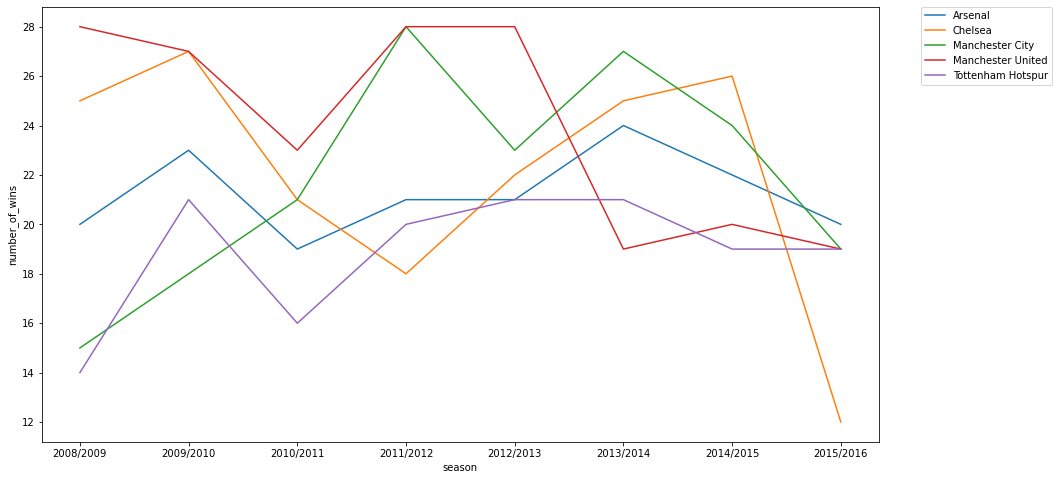

In [254]:
#plotting a line plot showing the trends of matches won over the years from the top 5 match winners
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='season', y='number_of_wins', hue='winner',data=top_5)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left', borderaxespad = 0)
ax.xlabel = "season"
plt.show()


`In the 2015/2016 season, Chelsea had the fewest victories, whereas both Manchester teams had the most wins in the 2011/2012 season.`

### What is the average number of goals scored in each league per season

In [255]:
#Making a copy of the dataframe for the total goals
df_tg = df_m.copy() 

In [256]:
#Combining the home team goals and away team goals to find the total goals
df_tg['total_goals'] = df_tg['home_team_goal'] + df_tg['away_team_goal']

In [257]:
df_tg.head(2)

,league,country,stage,date_x,year,start_season,end_season,match_api_id,team_fifa_api_id_x,home_team_goal,away_team_goal,home_team_name,away_team_name,total_goals
0,Switzerland Super League,Switzerland,17,2008-12-04,2008,2008,2009,486345,896,3,1,FC Basel,FC Aarau,4
1,Switzerland Super League,Switzerland,23,2009-03-07,2009,2008,2009,589790,896,3,1,FC Basel,FC Aarau,4


In [258]:
#group by 'league',"start_season", "end_season"
total_goal_group = df_tg.groupby(['league',"start_season", "end_season"])

In [259]:
#mean of the total number of goal for each leagues per season
gg_mean = total_goal_group["total_goals"].agg(np.mean)

In [260]:
gg_mean 

league                    start_season  end_season
Belgium Jupiler League    2008          2009          2.700000
                          2009          2010          2.690476
                          2010          2011          2.645833
                          2011          2012          2.879167
                          2012          2013          2.929167
                          2013          2014          2.500000
                          2014          2015          2.783333
                          2015          2016          2.891667
England Premier League    2008          2009          2.478947
                          2009          2010          2.771053
                          2010          2011          2.797368
                          2011          2012          2.805263
                          2012          2013          2.797368
                          2013          2014          2.768421
                          2014          2015          2.565789
    

In [261]:
# convert to data frame

In [262]:
gg_mean_df = gg_mean.to_frame().reset_index()
gg_mean_df.head()

,league,start_season,end_season,total_goals
0,Belgium Jupiler League,2008,2009,2.700000
1,Belgium Jupiler League,2009,2010,2.690476
2,Belgium Jupiler League,2010,2011,2.645833
3,Belgium Jupiler League,2011,2012,2.879167
4,Belgium Jupiler League,2012,2013,2.929167


In [263]:
#providing the season columns
gg_mean_df["season"] = gg_mean_df["start_season"]+ "/"+ gg_mean_df["end_season"]

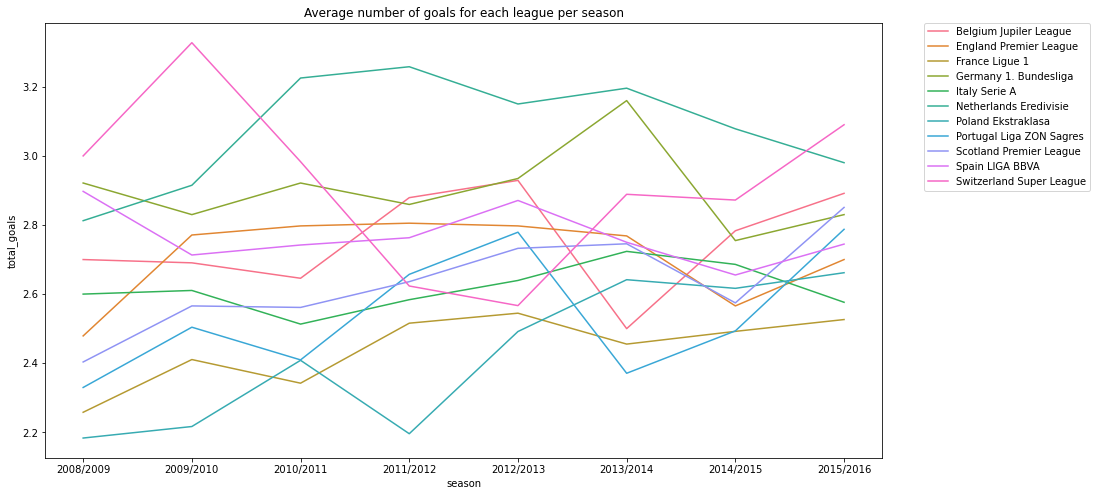

In [264]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='season', y='total_goals', hue='league',data=gg_mean_df)
#ax.grid(b=True, which='major', color='#ffffff', linewidth=0.5)
#ax.grid(b=True, which='minor', color='#000000', linewidth=0.5)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left', borderaxespad = 0)
ax.xlabel = "season"
plt.title("Average number of goals for each league per season")
plt.show()


Since the graph looked a little choked up, I reduced it to the elite leagues 

In [265]:
elite_leagues = ["England Premier League","France Ligue 1",'Germany 1. Bundesliga',"Italy Serie A","Spain LIGA BBVA"]

gg_sub = gg_mean_df[gg_mean_df.league.isin(elite_leagues)]

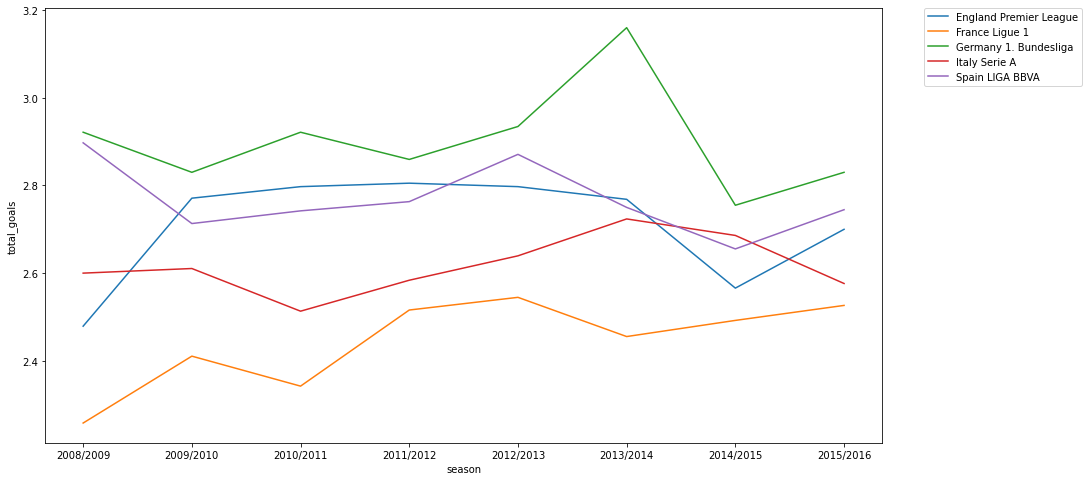

In [266]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='season', y='total_goals', hue='league',data=gg_sub)
#ax.grid(b=True, which='major', color='#ffffff', linewidth=0.5)
#ax.grid(b=True, which='minor', color='#000000', linewidth=0.5)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left', borderaxespad = 0)
ax.xlabel = "season"
plt.show()


We can see that the "German league" scored the most goals during this time span, while the "Italian league" scored the fewest.

## Exploring the Player Characteristics

 #### What are the top 10 players with the highest potential ?

In [267]:
#selec needed columns
player_p = df_p[["player_name","potential"]]

In [268]:
#group by "player name"
df_pp = player_p.groupby(["player_name"])["potential"].mean()

In [269]:
#sort the values from the highest to the lowest
df_potential = df_pp.sort_values(ascending = False)

Text(0.5, 1.0, 'Top ten players with the highest potential')

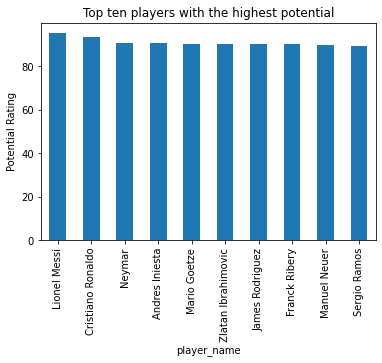

In [270]:
df_potential.head(10).plot(kind = "bar")
plt.ylabel("Potential Rating")
plt.title("Top ten players with the highest potential")

Lionel Messi is the player with the highest potential over the period from 2008 to 2016

 #### What are the top 10 players with the highest overall rating ?

In [271]:
#select needed columns
df_overall = df_p[["player_name","overall_rating"]]

In [272]:
#group by "player name"
df_over = df_overall.groupby(["player_name"])["overall_rating"].mean()

In [273]:
#sort the values from the highest to the lowest
df_o = df_over.sort_values(ascending = False)

Text(0, 0.5, 'Overall Rating')

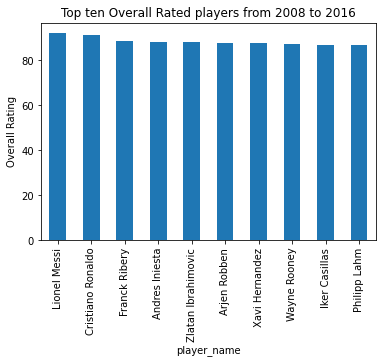

In [274]:
df_o.head(10).plot(kind = "bar")
plt.title("Top ten Overall Rated players from 2008 to 2016")
plt.ylabel("Overall Rating")

From 2008 through 2016, Lionel Messi was the highest rated player in the world.

### What are the attributes that contribute to the players' overall rating?

In [275]:
bp = ['attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle']

C:\Users\PROBOOK 440 G5\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


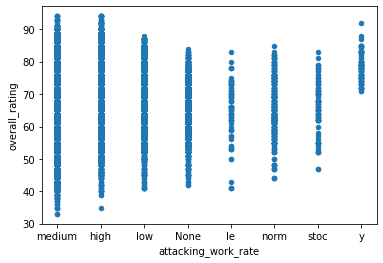

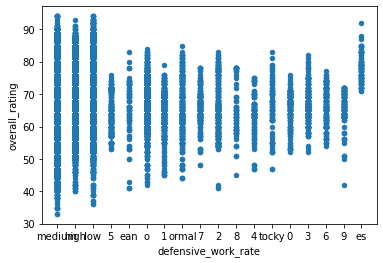

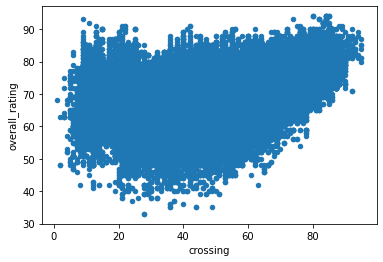

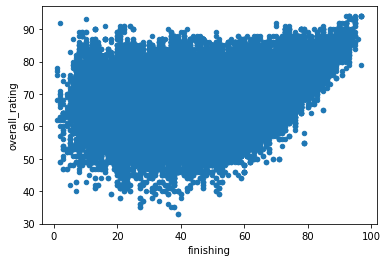

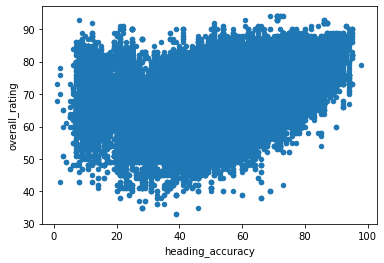

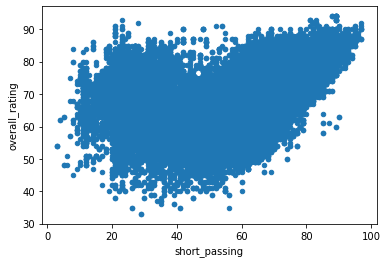

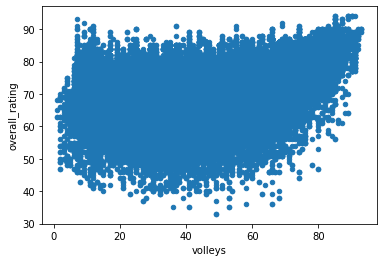

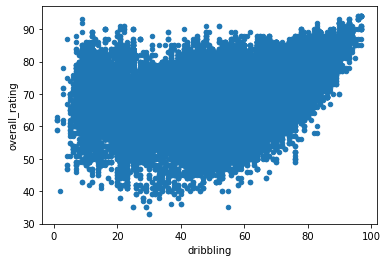

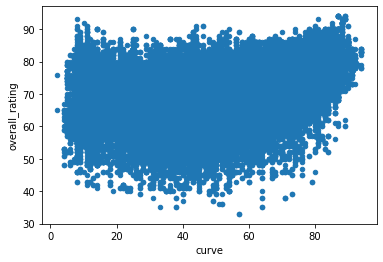

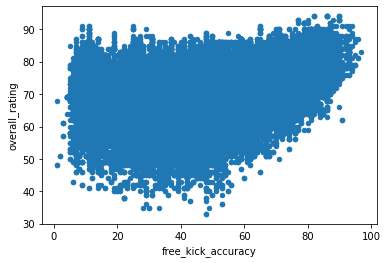

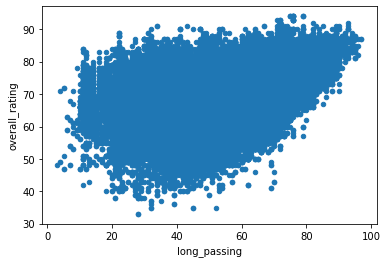

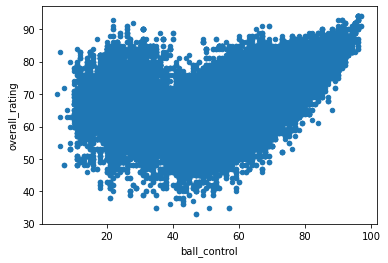

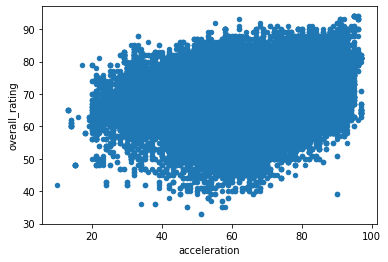

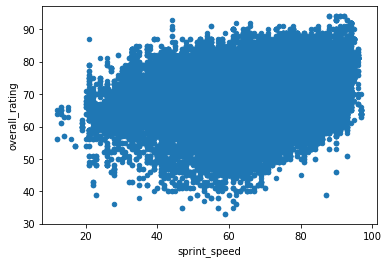

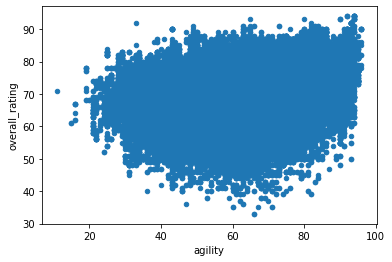

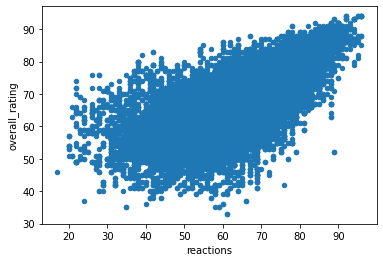

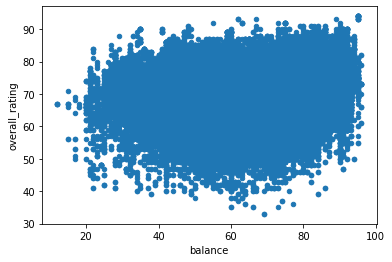

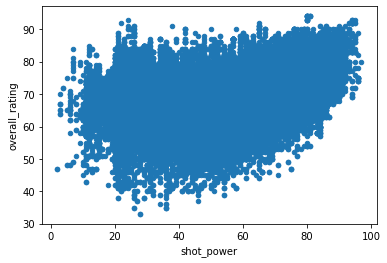

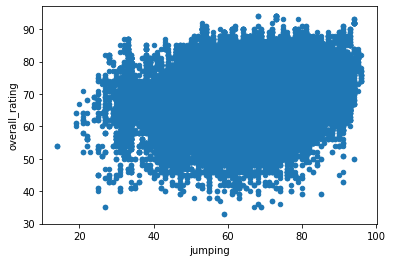

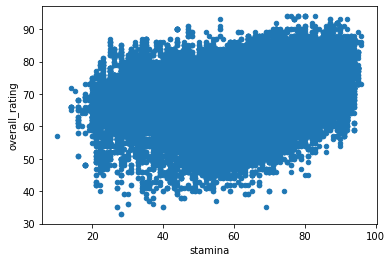

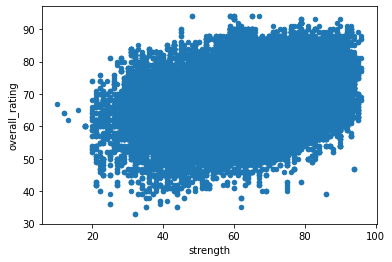

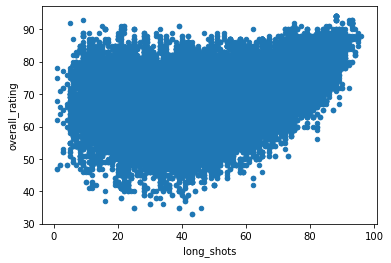

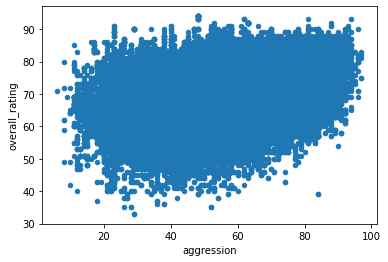

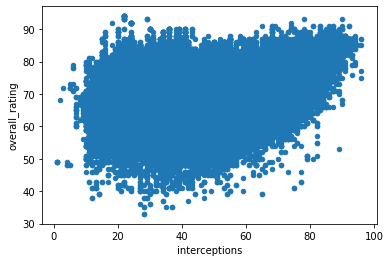

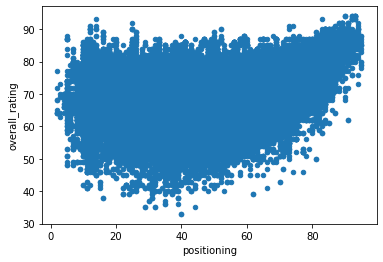

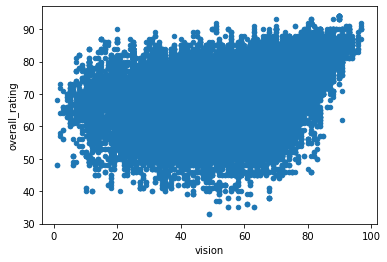

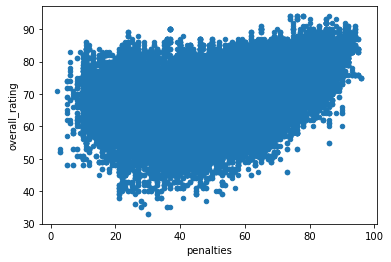

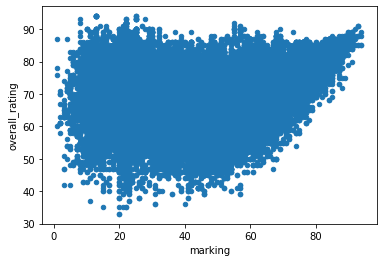

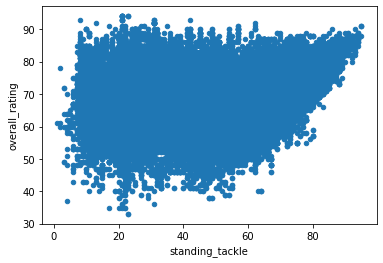

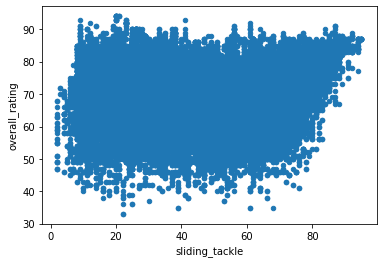

In [276]:
#Plotting a scatter plot to show the relationship the other attributes and the other ratings
for i in bp:
    df_p.plot(x = i , y ='overall_rating', kind='scatter');

There's a positive correlation between 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties','marking', 'standing_tackle', 'sliding_tackle' and `Overall_rating`, 


There is no correlation between 'attacking_work_rate', 'defensive_work_rate' and `Overall_rating`
        

In [277]:
#convert object to a datetime to be able to extract the year
df_p["birthday"] = pd.to_datetime(df_p['birthday'])

<ipython-input-277-2ed23926fda1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["birthday"] = pd.to_datetime(df_p['birthday'])


In [278]:
#create a column for the birth year
df_p['birth_year'] = df_p["birthday"].dt.year

<ipython-input-278-77e7341c4afc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['birth_year'] = df_p["birthday"].dt.year


array([[<AxesSubplot:title={'center':'birth_year'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>]], dtype=object)

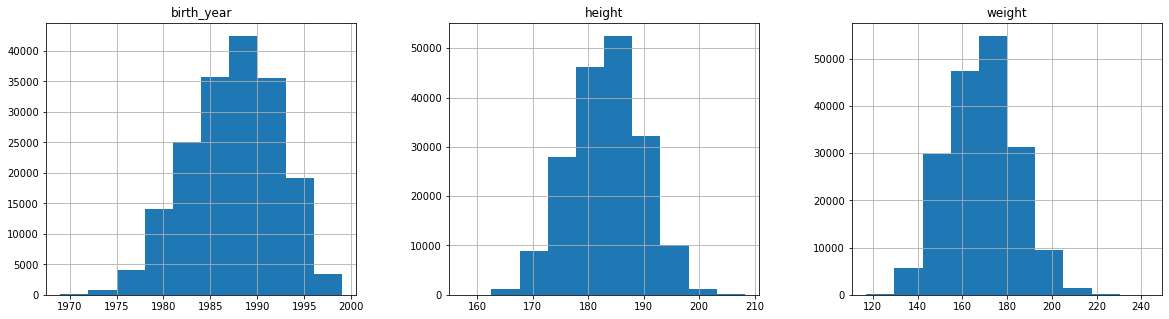

In [279]:
# Visualize the distribution of each variables
df_p[['birth_year', 'height', 'weight']].hist(figsize = (20, 5), layout = (1, 3))

The birthyear distribution is somewhat skewed to the left, showing that young players born after 1986 make up a larger proportion of the total than those born before 1986. The height and weight distributions are both balanced. The average height and weight are 181.9cm and 168.4lb, respectively.

In [280]:
df_py = df_p.copy()
df_py["year"] = df_py["date"].dt.year

### What is the ratings of the top 5 most rated player over the period of 2008 to 2015

In [281]:
# Listing the names of the top rated players
name = df_py[df_py["player_name"].isin(["Lionel Messi","Cristiano Ronaldo", "Andres Iniesta","Zlatan Ibrahimovic","Franck Ribery"])]

In [282]:
#Selecting the appropriate columns
rated_cols = name[["player_name","year","overall_rating"]]

In [283]:
#grouping the columns by player name and year
rated_g = rated_cols.groupby(["player_name","year"])["overall_rating"].mean()

In [284]:
#converting back to dataframe
rated_df = rated_g.to_frame().reset_index()

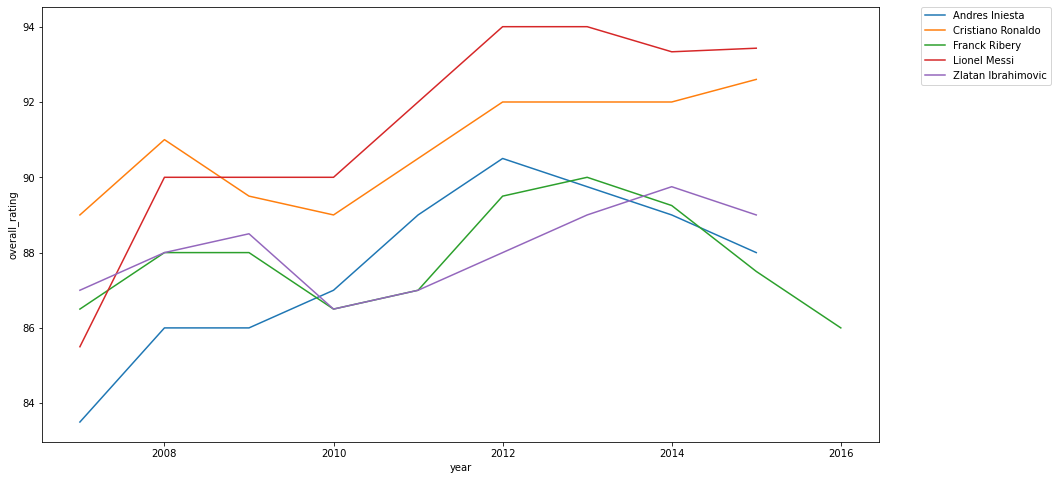

In [285]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='year', y='overall_rating', hue='player_name',data=rated_df)
#ax.grid(b=True, which='major', color='#ffffff', linewidth=0.5)
#ax.grid(b=True, which='minor', color='#000000', linewidth=0.5)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left', borderaxespad = 0)
ax.xlabel = "season"
plt.show()


As the year progresses, we can see that Lionel Messi's ratings have grown year after year, which is why he is the highest overall rated player, whereas Ribery, Iniesta, and Zlatan's ratings have declined as the year progresses.

### What team attributes lead to the most victories?

- Examining the best leagues in England, Spain, Italy, Germany, and France to see who has the most match winners.

In [286]:
#The most match winner in england
england = df_mw.query('country == "England"')
england['winner'].value_counts().head(1)

Manchester United    192
Name: winner, dtype: int64

In [287]:
# The most match winner in spain
spain = df_mw.query('country == "Spain"')
spain['winner'].value_counts().head(1)

FC Barcelona    234
Name: winner, dtype: int64

In [288]:
#The most match winner in italy
italy = df_mw.query('country == "Italy"')
italy['winner'].value_counts().head(1)

Juventus    189
Name: winner, dtype: int64

In [289]:
#The most match winner in germany
germany = df_mw.query('country == "Germany"')
germany['winner'].value_counts().head(1)

FC Bayern Munich    193
Name: winner, dtype: int64

In [290]:
#The most match winner in france
france = df_mw.query('country == "France"')
france['winner'].value_counts().head(1)

Paris Saint-Germain    175
Name: winner, dtype: int64

In [291]:
#Filtering the most match winners in different leagues from the team dataframe
match_winner = df_t[df_t["team_long_name"].isin(["Manchester United","FC Barcelona","Juventus","FC Bayern Munich","Paris Saint-Germain"])]

Text(0.5, 1.0, 'Top teams from the top 5 leagues defenceDefenderLineClass')

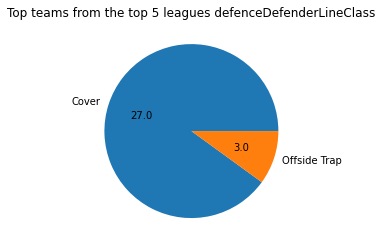

In [292]:
i = "defenceDefenderLineClass"
def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    
labels = ["Cover","Offside Trap"]
plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues defenceTeamWidthClass')

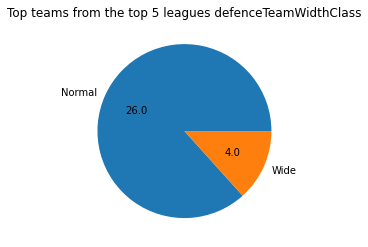

In [293]:
i = "defenceTeamWidthClass"
def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    
labels = ["Normal","Wide"]
plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues defenceAggressionClass')

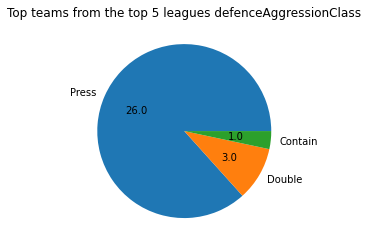

In [294]:
i = "defenceAggressionClass"    
labels = ["Press","Double","Contain"]

def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    
plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues defencePressureClass')

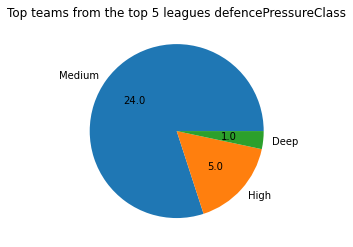

In [295]:
i = "defencePressureClass"   
labels = ["Medium","High","Deep"]

def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    

plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues chanceCreationShootingClass')

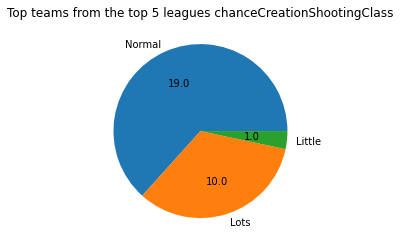

In [296]:
i = "chanceCreationShootingClass"
labels = ["Normal","Lots","Little"]

def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    

plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues chanceCreationCrossingClass')

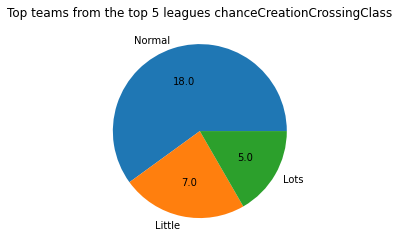

In [297]:
i = "chanceCreationCrossingClass"
labels = ["Normal","Little","Lots"]

def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    

plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues buildUpPlayPassingClass')

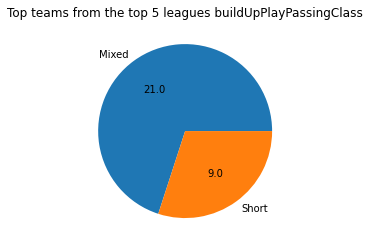

In [298]:
i = "buildUpPlayPassingClass"
labels = ["Mixed","Short"]

def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    

plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues buildUpPlayDribblingClass')

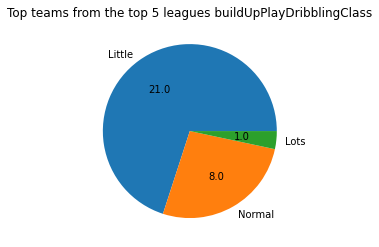

In [299]:
i = "buildUpPlayDribblingClass"
labels = ["Little","Normal","Lots"]

def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    

plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues buildUpPlaySpeedClass')

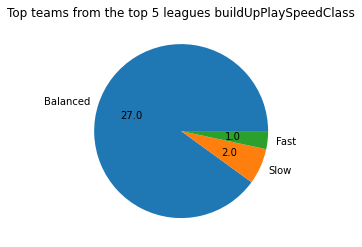

In [300]:
i = "buildUpPlaySpeedClass"
labels = ["Balanced","Slow","Fast"]

def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    

plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

Text(0.5, 1.0, 'Top teams from the top 5 leagues chanceCreationPositioningClass')

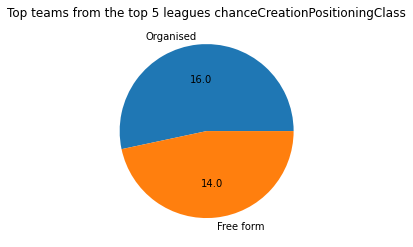

In [301]:
i = "chanceCreationPositioningClass"
def absolute_value(val):
    a = np.round(val/100.*match_winner[i].value_counts().astype("int").sum(),0)
    return a    
labels = ["Organised","Free form"]
plt.pie(match_winner[i].value_counts().astype("int"),labels = labels, autopct = absolute_value)
plt.title("Top teams from the top 5 leagues "+i)

I believe that utilizing a
- Normal Team width
- A press in defensive aggression
- A medium in defensive pressure
- Normal chance created shot.
- Normal chance created cross 
- A mix build up play pass
- A little build up play dribble
- Balanced play speed and organised positioning
- Using a cover instead of an offiside trap when defending

ensures the success of the greatest teams.

## Limitations

- Due to the fact that the data was fairly combined and cleaned, I had several limits and obstacles throughout the analysis of this project. It was quite stressful combining different parts of the data.

## Final Thoughts

- During the period 2008-2016, I discovered that Spain, Germany, England, and Scotland had the best leagues in Europe. Over this time span, the best teams have won between 150 and 200 games, with Barcelona winning over 200.

- Looking only at the English Premier League from 2008 to 2016, I discovered that Chelsea had the fewest victories in the 2015/2016 season, whereas both Manchester teams had the most wins in the 2011/2012 season.

- During this time span (2008-2016), the "German league" scored the most goals, while the "Italian league" scored the fewest.

- Lionel Messi was the player with the highest overall rating and the most potential. Heading accuracy, ball control, sprint speed, long shoots, shooting power, dribbling, and strength are the traits that contribute to the players' overall rating.

- A balanced play pace and organized positioning, a press in defensive aggression, and employing cover instead of the offside trap while defending may all contribute to the success of the top teams.

In [302]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'European Soccer Investigation Project.ipynb'])

1